In [23]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [87]:
csv_path = Path("Tornado_alley/Resources/us_tornado_dataset_1950_2021.csv")
tornadoes_df = pd.read_csv(csv_path, encoding="UTF-8")
tornadoes_df = tornadoes_df.rename(columns={"yr": "Year"})
tornadoes_df.head(20)

,Year,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1/3/50,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1/3/50,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1/3/50,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1/13/50,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1/25/50,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100
5,1950,1,25,1/25/50,MO,2,5,0,37.60,-90.68,37.63,-90.65,2.3,300
6,1950,1,26,1/26/50,TX,2,2,0,26.88,-98.12,26.88,-98.05,4.7,133
7,1950,2,11,2/11/50,TX,2,0,0,29.42,-95.25,29.52,-95.13,9.9,400
8,1950,2,11,2/11/50,TX,2,5,0,32.35,-95.20,32.42,-95.20,4.6,100
9,1950,2,11,2/11/50,TX,2,6,0,32.98,-94.63,33.00,-94.70,4.5,67


In [89]:
TCount = tornadoes_df["Year"].value_counts()
TCount

Year
2004    1817
2011    1691
2008    1689
2019    1517
2017    1428
        ... 
1963     463
1953     421
1951     260
1952     240
1950     201
Name: count, Length: 72, dtype: int64

In [91]:
A_I_py = tornadoes_df.groupby("Year")["inj"].mean()
AIpy = round(A_I_py, 2)
AIpy_DF = pd.DataFrame(AIpy)

A_F_py = tornadoes_df.groupby("Year")["fat"].mean()
AFpy = round(A_F_py, 2)
AFpy_DF = pd.DataFrame(AFpy)

A_M_py = tornadoes_df.groupby("Year")["mag"].mean()
AMpy = round(A_M_py, 2)
AMpy_DF = pd.DataFrame(AMpy)

A_L_py = tornadoes_df.groupby("Year")["len"].mean()
ALpy = round(A_L_py, 2)
ALpy_DF = pd.DataFrame(ALpy)

A_W_py = tornadoes_df.groupby("Year")["wid"].mean()
AWpy = round(A_W_py, 2)
AWpy_DF = pd.DataFrame(AWpy)

In [92]:
Merge12 = pd.merge(AIpy_DF, AFpy_DF, on="Year")
Merged123 = pd.merge(Merge12, AMpy_DF, on="Year")
Merged_Danger_df = pd.merge(Merged123, ALpy_DF, on="Year")

Merged_Danger_df = Merged_Danger_df.rename(columns={"inj": "Injuries", "fat": "Fatalities", "mag": "Magnitude", "len": "Length in Yards"})
Merged_Danger_df.head()

,Injuries,Fatalities,Magnitude,Length in Yards
Year,,,,
1950,3.28,0.35,1.60,6.41
1951,2.02,0.13,1.37,4.64
1952,7.98,0.96,1.69,6.92
1953,12.19,1.24,1.52,9.16
1954,1.30,0.07,1.36,5.93


C:\Users\blake\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


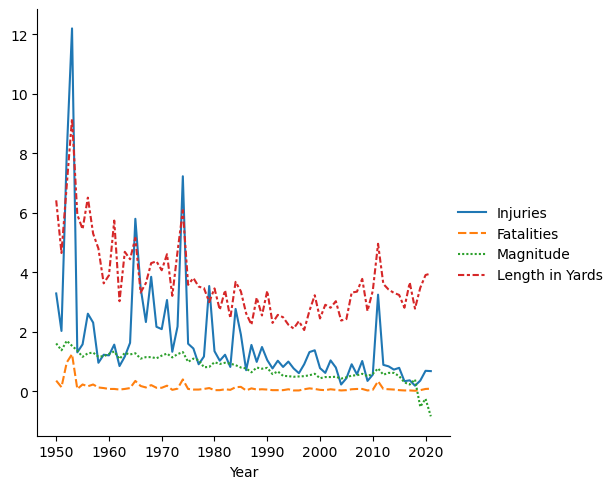

In [93]:
####### Danger's relationship with Tornadoe path length #############

sns.relplot(data=Merged_Danger_df, kind="line")